In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [4]:
UTAdf = gdf[gdf.Tm == 'UTA']
SASdf = gdf[gdf.Tm == 'SAS']


In [5]:
UTAdf.Date = UTAdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
UTAdf = UTAdf[(UTAdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (UTAdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

SASdf.Date = SASdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
SASdf = SASdf[(SASdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (SASdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

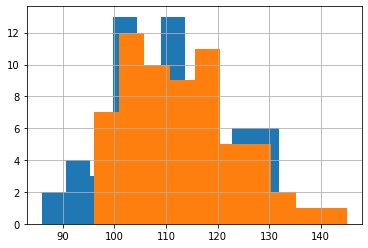

In [6]:
UTAdf.TeamPTS.hist()
SASdf.TeamPTS.hist()

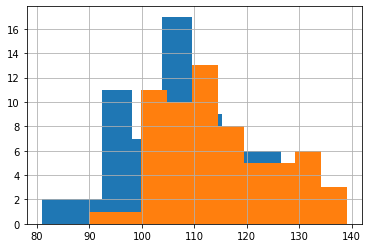

In [7]:
UTAdf.OpponentPTS.hist()
SASdf.OpponentPTS.hist()

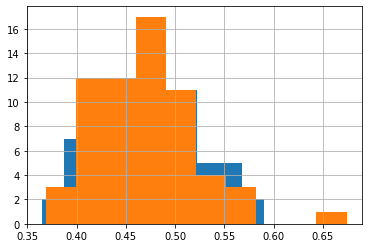

In [8]:
UTAdf.TeamFGP.hist()
SASdf.TeamFGP.hist()

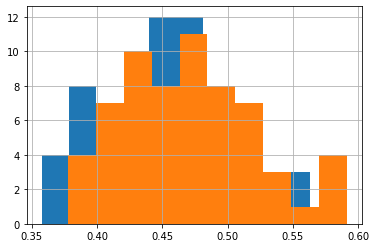

In [9]:
UTAdf.OpponentFGP.hist()
SASdf.OpponentFGP.hist()

In [10]:
UTAmeanpts = UTAdf.TeamPTS.mean()
SASmeanpts = SASdf.TeamPTS.mean()
UTAfgp = UTAdf.TeamFGP.mean()
SASfgp = SASdf.TeamFGP.mean()
UTAsdpts = UTAdf.TeamPTS.std()
SASsdpts = SASdf.TeamPTS.std()

UTAmeaSASp = UTAdf.OpponentPTS.mean()
SASmeaSASp = SASdf.OpponentPTS.mean()
UTAfgpopp = UTAdf.OpponentFGP.mean()
SASfgpopp = SASdf.OpponentFGP.mean()
UTAsdopp = UTAdf.OpponentPTS.std()
SASsdopp = SASdf.OpponentPTS.std()

print("UTA Mean ", UTAmeanpts)
print("UTA FG% ", UTAfgp)
print("UTA Points Standard Deviation ", UTAsdpts)
print("SAS Points Mean ", SASmeanpts)
print("SAS FG% ", SASfgp)
print("SAS Points Standard Deviation ", SASsdpts)

print("UTA OppPoints Mean ", UTAmeaSASp)
print("UTA OppFG% Mean ", UTAfgpopp)
print("UTA OppPoints SD ", UTAsdopp)
print("SAS OppPoints Mean ", SASmeaSASp)
print("SAS OppFG% Mean ", SASfgpopp)
print("SAS OppPoints SD ", SASsdopp)

UTA Mean  111.03125
UTA FG%  0.47518750000000004
UTA Points Standard Deviation  11.168221284818218
SAS Points Mean  113.15873015873017
SAS FG%  0.471126984126984
SAS Points Standard Deviation  10.724115647735774
UTA OppPoints Mean  107.859375
UTA OppFG% Mean  0.45240624999999995
UTA OppPoints SD  11.85610443196193
SAS OppPoints Mean  114.92063492063492
SAS OppFG% Mean  0.47053968253968254
SAS OppPoints SD  11.045801402462017


In [11]:
def gameSim():
    UTAScore = (rnd.gauss(UTAmeanpts,UTAsdpts)+ rnd.gauss(SASmeaSASp,SASsdopp))/2
    SASScore = (rnd.gauss(SASmeanpts,SASsdpts)+ rnd.gauss(SASmeaSASp,SASsdopp))/2
    if int(round(UTAScore)) > int(round(SASScore)):
        return 1
    elif int(round(UTAScore)) < int(round(SASScore)):
        return -1
    else: return 0

In [12]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('UTA Win ', team1win/(team1win+team2win),'%')
    print('SAS Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [13]:
gAmesSim(10000)

UTA Win  0.46585594013096354 %
SAS Win  0.5341440598690365 %


[-1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1